# Appendix B: Exploratory Data Analysis

Importing the required libraries and csv file. Only the Victorian data set is used in this project. Open the accompanying csv file to run this notebook and keep it open

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
VIC=pd.read_csv("VIC_Data_Compiled.csv")
VIC.head()

,date,DEMAND,RRP,TEMP
0,2000-01-01 01:30:00,4599.70167,13.22,13.7
1,2000-01-01 02:00:00,4478.99000,12.90,13.6
2,2000-01-01 02:30:00,4228.81000,12.40,13.3
3,2000-01-01 03:00:00,3989.10000,9.45,14.1
4,2000-01-01 03:30:00,3783.93167,4.82,13.5


Statistical summaries of test and predicted data will be used to compare rises in demand. RRP is invluded but not relevant to the study.

In [5]:
VIC.describe()

,DEMAND,RRP,TEMP
count,349440.000000,349440.000000,349440.000000
mean,5484.401953,46.879696,15.945206
std,886.647915,163.978238,5.610528
min,2967.210000,-817.030000,0.800000
25%,4832.877500,21.650000,12.000000
50%,5418.080000,31.920000,15.200000
75%,6120.988750,50.910000,19.000000
max,10414.860000,14500.000000,45.900000


An extremely simple correlation matrix was produced but the key figure to pay attention to is the correlation between temperature and demand. RRP was not discussed as a factor because economic factors would have to be discussed otherwise, convoluting the purpose of this analysis.

In [6]:
VIC.corr()

,DEMAND,RRP,TEMP
DEMAND,1.000000,0.120500,0.171418
RRP,0.120500,1.000000,0.077767
TEMP,0.171418,0.077767,1.000000


In [7]:
VIC= VIC.set_index(pd.to_datetime(VIC["date"]))
VIC= VIC.drop(columns=["date"])

In [8]:
day_data = VIC[pd.Timestamp("2016-01-01 00:00:00"):pd.Timestamp("2016-01-02 00:00:00")]
day_data.isna().any()

DEMAND    False
RRP       False
TEMP      False
dtype: bool

The intention of this rolling means graph is to demonstrate the cyclical trends observed in both energy demand and temperature. It can be seen that there is an inverse relationship between temperature and demand on a seasonal scale. For example, higher demand occurs during periods of extreme coldness or heat. Making specfic inferences, it can be seen that during the periods with neither high nor low temperatures, demand is low. When the temperatures observed are colder, the demand for electricity peaks to a higher level than when temperatures observed are relatively high. This may infer that either heaters consume more energy than the use of coolers or the frequency of heaters being used when needed is significantly higher thn the frequency of coolers being utilised.

<AxesSubplot:title={'center':'Victoria Energy Demand'}, xlabel='date'>

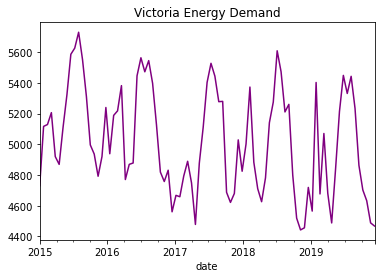

In [9]:
VIC.resample("3W").mean()["DEMAND"]["2015":"2019"].plot(color="purple", title="Victoria Energy Demand")

<AxesSubplot:title={'center':'Victoria temperture'}, xlabel='date'>

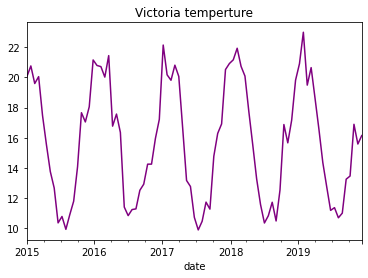

In [10]:
VIC.resample("3W").mean()["TEMP"]['2015':'2019'].plot(color="purple", title="Victoria temperture")

The rough shape of a sample of the scattered data is actually a mildly accurate representation of the population data, as seen later in the modelling appendices. In the sample, there is a lack of data, relatively speaking, in comparison to te rest of the regions. This is also present in the population data and can create some issues when modelling around the upper region.

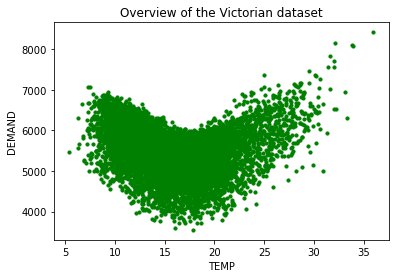

In [11]:
VIC.resample("D").mean().plot(kind="scatter",x="TEMP", y="DEMAND", s=10, color= "green", title="Overview of the Victorian dataset");